# LAB 4 : EDA AND DATA WRANGING


---

### **Introduction**

Data analysis is a cornerstone of modern decision-making, and effective analysis begins with **Exploratory Data Analysis (EDA)** and **data wrangling**. These processes form the foundation for uncovering insights and ensuring data quality, enabling informed and accurate decision-making.

---

#### **EDA: Exploratory Data Analysis**  
EDA is a systematic approach used by data scientists and analysts to:  
- Investigate datasets and summarize their main characteristics.  
- Identify patterns, spot anomalies, and test hypotheses.  
- Use descriptive statistics and visualization techniques to explore data.  

The primary goal of EDA is to provide an accurate understanding of the data before proceeding with further analysis or modeling. In this lab, EDA played a critical role in identifying user viewership categories and analyzing production trends across countries. These insights informed the overall understanding of global entertainment patterns.

---

#### **Data Wrangling**  
Data wrangling involves transforming raw data into a usable, structured format. This essential step ensures that datasets are:  
- Complete and consistent.  
- Free from anomalies, missing values, or redundancies.  
- Properly formatted for analysis.

Key tasks in data wrangling include:  
- **Cleaning:** Fixing missing values, handling duplicates, and standardizing formats.  
- **Integration:** Merging multiple datasets (e.g., IMDb and Netflix data) to create a unified dataset.  
- **Transformation:** Normalizing data, encoding categorical variables, and creating new features for analysis.  

In this lab, data wrangling was pivotal in preparing the IMDb and Netflix datasets. Tasks like merging, cleaning, and structuring data ensured a robust base for analysis, enabling the extraction of meaningful insights.

---

Together, EDA and data wrangling allowed us to analyze the IMDb and Netflix datasets effectively. By leveraging columns such as 'rating' and 'type' and examining production data across countries, we gained a comprehensive understanding of user preferences and production trends. These methods highlight the importance of making data reliable and actionable for answering complex analytical questions confidently.

---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [ ]:
imdb_df = pd.read_csv('imdb_rating.csv')
netflix_df = pd.read_csv('netflix_data.csv')

imdb_df.head()


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [ ]:
# dropping the columns that are not required
netflix_df.drop(columns = ['show_id', 'cast', 'date_added', 'duration', 'description', 'listed_in'], inplace = True)
imdb_df = imdb_df.drop(columns = ['ONE-LINE', 'STARS', 'RunTime','Gross'])

# Preliminary Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOVIES  9999 non-null   object 
 1   YEAR    9355 non-null   object 
 2   GENRE   9919 non-null   object 
 3   RATING  8179 non-null   float64
 4   VOTES   8179 non-null   object 
dtypes: float64(1), object(4)
memory usage: 390.7+ KB


<Axes: >

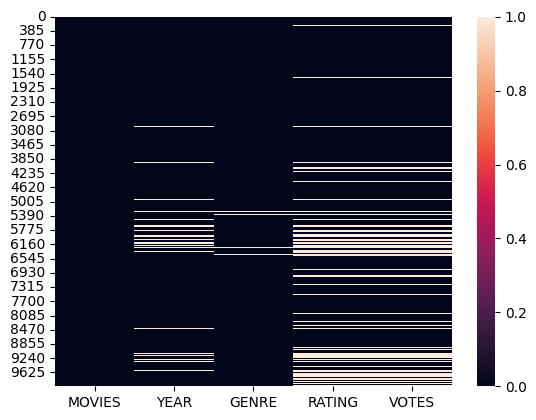

In [ ]:
imdb_df.info()

# plotting histplot to view null_data
sns.heatmap(imdb_df.isna())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      8807 non-null   object
 1   title     8807 non-null   object
 2   director  6173 non-null   object
 3   country   7976 non-null   object
 4   rating    8803 non-null   object
dtypes: object(5)
memory usage: 344.1+ KB


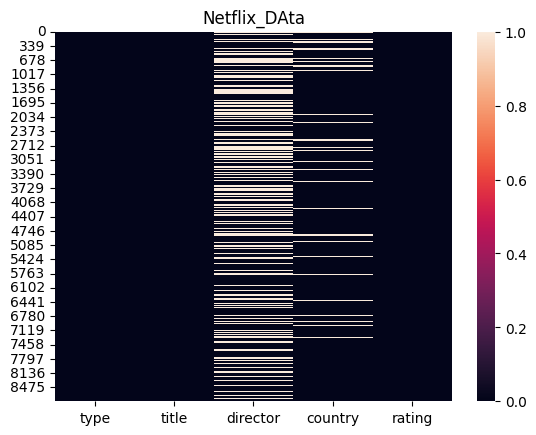

In [ ]:
netflix_df.info()
sns.heatmap(netflix_df.isna())
plt.title("Netflix_DAta")
plt.show()

In [ ]:
# dropping the NaN values from the database
print(f"Netflix Data \n {netflix_df.isna().sum()}")

netflix_df.dropna(inplace=True)

print(f"\n\nNetflix Data \n {netflix_df.isna().sum()}")

netflix_df.info()

Netflix Data 
 type           0
title          0
director    2634
country      831
rating         4
dtype: int64


Netflix Data 
 type        0
title       0
director    0
country     0
rating      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 5750 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      5750 non-null   object
 1   title     5750 non-null   object
 2   director  5750 non-null   object
 3   country   5750 non-null   object
 4   rating    5750 non-null   object
dtypes: object(5)
memory usage: 269.5+ KB


In [ ]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOVIES  9999 non-null   object 
 1   YEAR    9355 non-null   object 
 2   GENRE   9919 non-null   object 
 3   RATING  8179 non-null   float64
 4   VOTES   8179 non-null   object 
dtypes: float64(1), object(4)
memory usage: 390.7+ KB


In [ ]:
# dropping the NaN values form the imdb_data
print(f"Imdb_data \n\n {imdb_df.isna().sum()}")

new_df = imdb_df.dropna(how='any')

print(f"Imdb_data \n\n {imdb_df.isna().sum()}")

Imdb_data 

 MOVIES              0
GENRE               0
RATING              0
VOTES               0
Released_Year       0
title            4371
type             4371
dtype: int64
Imdb_data 

 MOVIES              0
GENRE               0
RATING              0
VOTES               0
Released_Year       0
title            4371
type             4371
dtype: int64


In [ ]:
# imdb_df.info()
imdb_df = new_df


In [ ]:
imdb_df.info()
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOVIES  9999 non-null   object 
 1   YEAR    9355 non-null   object 
 2   GENRE   9919 non-null   object 
 3   RATING  8179 non-null   float64
 4   VOTES   8179 non-null   object 
dtypes: float64(1), object(4)
memory usage: 390.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5750 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      5750 non-null   object
 1   title     5750 non-null   object
 2   director  5750 non-null   object
 3   country   5750 non-null   object
 4   rating    5750 non-null   object
dtypes: object(5)
memory usage: 269.5+ KB


In [ ]:
imdb_df.drop_duplicates(subset=['MOVIES'],inplace=True)
print(imdb_df.duplicated().sum())
imdb_df.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 5507 entries, 0 to 5788
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MOVIES         5507 non-null   object 
 1   GENRE          5507 non-null   object 
 2   RATING         5507 non-null   float64
 3   VOTES          5507 non-null   int64  
 4   Released_Year  5507 non-null   object 
 5   title          1416 non-null   object 
 6   type           1416 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 344.2+ KB


In [ ]:
# dropping the duplicate from the netflix data
netflix_df.drop_duplicates(subset=['title'],inplace=True)
netflix_df.duplicated().sum()


0

In [ ]:
netflix_df.head()
imdb_df.head()
# imdb_df.YEAR.unique() # viewing the unique years in the database


imdb_df['Released_Year'] = (imdb_df.YEAR.str.extract(r'(\d{4})')) # extracing only year


imdb_df.drop('YEAR', inplace=True, axis=1) # deleting the year column

imdb_df


#

,MOVIES,GENRE,RATING,VOTES,Released_Year,title,type
0,blood red sky,"Action, Horror, Thriller",6.1,21062,2021,NaN,NaN
1,masters of the universe: revelation,"Animation, Action, Adventure",5.0,17870,2021,NaN,NaN
2,the walking dead,"Drama, Horror, Thriller",8.2,885805,2010,NaN,NaN
3,rick and morty,"Animation, Adventure, Comedy",9.2,414849,2013,NaN,NaN
4,outer banks,"Action, Crime, Drama",7.6,25858,2020,NaN,NaN
...,...,...,...,...,...,...,...
5550,alex,"Action, Crime, Thriller",7.3,30,2017,NaN,NaN
5653,the drew barrymore show,Talk-Show,6.8,14,2020,NaN,NaN
5733,nbc sunday night football,Sport,6.6,11,2006,NaN,NaN
5776,dad stop embarrassing me,"Comedy, Family",5.7,98,2021,NaN,NaN


In [ ]:
# transforming the the VOTES columns to numericmel column
imdb_df['VOTES'] = imdb_df.VOTES.str.replace(",", "" ,regex=True)
#
imdb_df.VOTES = pd.to_numeric(imdb_df['VOTES'])
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5507 entries, 0 to 5788
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MOVIES         5507 non-null   object 
 1   GENRE          5507 non-null   object 
 2   RATING         5507 non-null   float64
 3   VOTES          5507 non-null   int64  
 4   Released_Year  5507 non-null   object 
 5   title          1416 non-null   object 
 6   type           1416 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 473.2+ KB


In [ ]:
# replacing the \n characters
imdb_df['GENRE'] = imdb_df.GENRE.str.strip().str.replace(r'\n','', regex=True)
imdb_df['GENRE']


,GENRE
0,"Action, Horror, Thriller"
1,"Animation, Action, Adventure"
2,"Drama, Horror, Thriller"
3,"Animation, Adventure, Comedy"
4,"Action, Crime, Drama"
...,...
5550,"Action, Crime, Thriller"
5653,Talk-Show
5733,Sport
5776,"Comedy, Family"


In [ ]:
# merging the two databases netflix_df and imdb_df
# merged_data = pd.merge(left=imdb_data, right=netflix_data, how='inner', left_on='MOVIES', right_on='title')
merged_df = pd.merge(left=imdb_df, right=netflix_df, how='inner', left_on='MOVIES', right_on='title')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MOVIES         1436 non-null   object 
 1   GENRE          1436 non-null   object 
 2   RATING         1436 non-null   float64
 3   VOTES          1436 non-null   int64  
 4   Released_Year  1436 non-null   object 
 5   type           1436 non-null   object 
 6   title          1436 non-null   object 
 7   director       1436 non-null   object 
 8   country        1436 non-null   object 
 9   rating         1436 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 112.3+ KB


# Find for each year the 5 most popular shows and movies separately (i.e. use the information from ‘type’ column of netflix data to find if it is a show or a movie and rank the shows and movies separately)

In [ ]:
# movies_df
# # Create a mapping of 'title' to 'type' from netflix_df
# title_to_type = dict(zip(netflix_df['title'], netflix_df['type']))

# # Map the 'type' values to the 'MOVIES' column in imdb_df
# imdb_df['type'] = imdb_df['MOVIES'].map(title_to_type)

# sort the database by the year and votes
# top_100_per_year = imdb_df.sort_values(['Released_Year', 'VOTES'], ascending=[True, False]).groupby('Released_Year').head(100)
movie_df = merged_df[merged_df['type']=='Movie']

top_5movie_per_year = movie_df.sort_values(['Released_Year', 'VOTES'], ascending=[False, False]).groupby('Released_Year', as_index=False).head(5)


top_5movie_per_year[['Released_Year', 'MOVIES', 'RATING', 'rating', 'type', 'VOTES']]


,Released_Year,MOVIES,RATING,rating,type,VOTES
4,2021,army of the dead,5.8,R,Movie,132378
33,2021,the dig,7.1,PG-13,Movie,60598
16,2021,the woman in the window,5.7,R,Movie,57048
135,2021,the white tiger,7.1,R,Movie,51960
115,2021,outside the wire,5.4,R,Movie,37342
...,...,...,...,...,...,...
87,1968,rosemary's baby,8.0,R,Movie,201472
22,1966,star trek,8.3,PG-13,Movie,76213
803,1945,nazi concentration camps,8.3,TV-MA,Movie,1358
1254,1945,know your enemy - japan,6.0,TV-14,Movie,764


In [ ]:
# Shows Df
merged_df.head()

# TV Show df
show_df = merged_df[merged_df['type']=='TV Show']

top_5show_per_year = show_df.sort_values(['Released_Year', 'VOTES'], ascending=[False, False]).groupby('Released_Year', as_index=False).head(5)


top_5show_per_year[['Released_Year', 'MOVIES', 'RATING', 'rating', 'type', 'VOTES']]


,Released_Year,MOVIES,RATING,rating,type,VOTES
220,2021,night stalker: the hunt for a serial killer,7.5,TV-MA,TV Show,20124
389,2021,crime scene: the vanishing at the cecil hotel,5.9,TV-MA,TV Show,15072
65,2021,halston,7.5,TV-MA,TV Show,10460
453,2021,murder among the mormons,7.0,TV-14,TV Show,4914
182,2021,trese,7.1,TV-MA,TV Show,2521
317,2020,"tiger king: murder, mayhem and madness",7.5,TV-MA,TV Show,70207
50,2020,feel good,7.5,TV-MA,TV Show,7949
419,2020,the ripper,7.1,TV-MA,TV Show,7810
131,2020,julie and the phantoms,8.5,TV-G,TV Show,7576
547,2020,the pharmacist,7.7,TV-MA,TV Show,6140


In [ ]:
netflix_df.head()

,type,title,director,country,rating
0,Movie,dick johnson is dead,Kirsten Johnson,United States,PG-13
7,Movie,sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",TV-MA
8,TV Show,the great british baking show,Andy Devonshire,United Kingdom,TV-14
9,Movie,the starling,Theodore Melfi,United States,PG-13
12,Movie,je suis karl,Christian Schwochow,"Germany, Czech Republic",TV-MA


#  Find what genre of movies are most popular (top 10) and show in a bar graph.

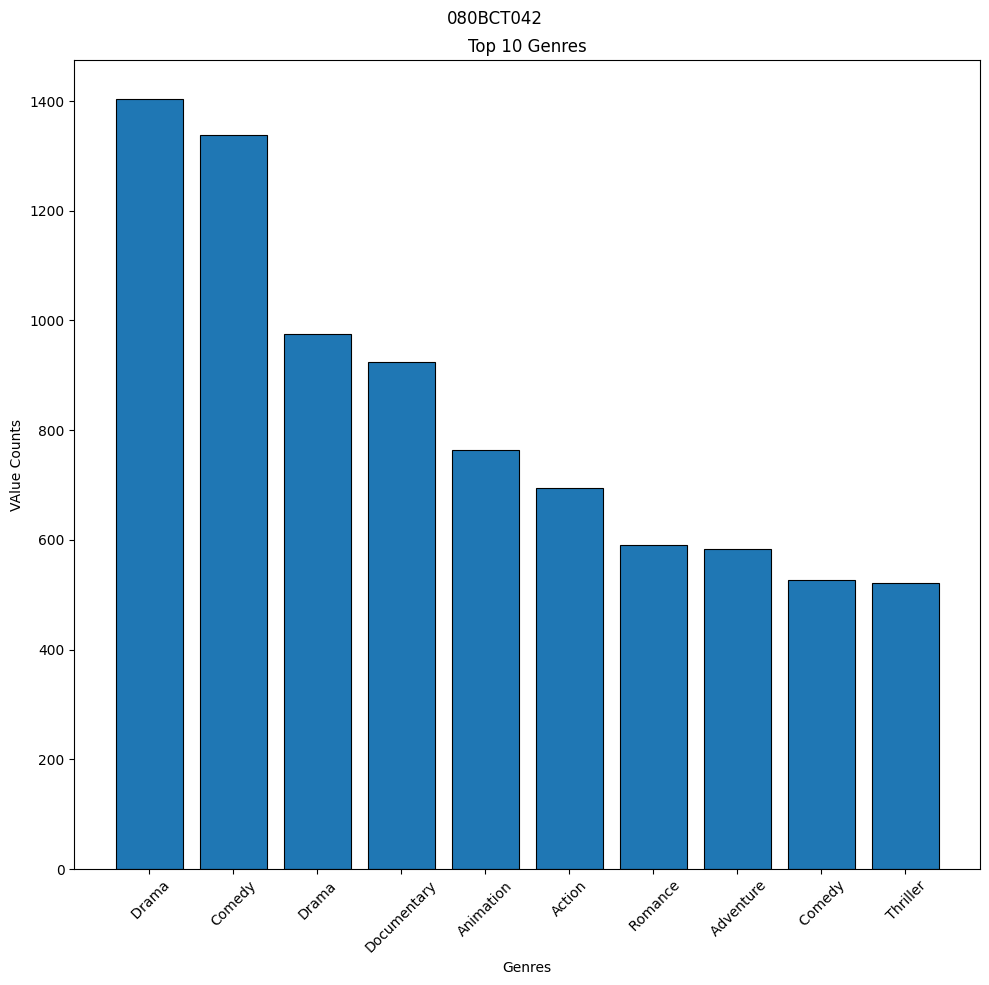

In [ ]:
# using .stack() method to split and stack the the strings
stack = imdb_df.GENRE.str.split(',', expand=True).stack()
genre_count = stack.value_counts()

top_10_genre = genre_count.head(10)



top_10_genre

fig, ax = plt.subplots(figsize=(10,10))
plt.suptitle("080BCT042")
ax.set_title("Top 10 Genres")
ax.set_ylabel("VAlue Counts")
ax.set_xlabel("Genres")

bar = ax.bar(top_10_genre.index, top_10_genre.values, edgecolor='black', linewidth=0.8)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


 # Plot the distribution of values of ‘RATING’ column of imdb dataset using histogram plot and in a box plot. Also identify outlier values using the box plot.

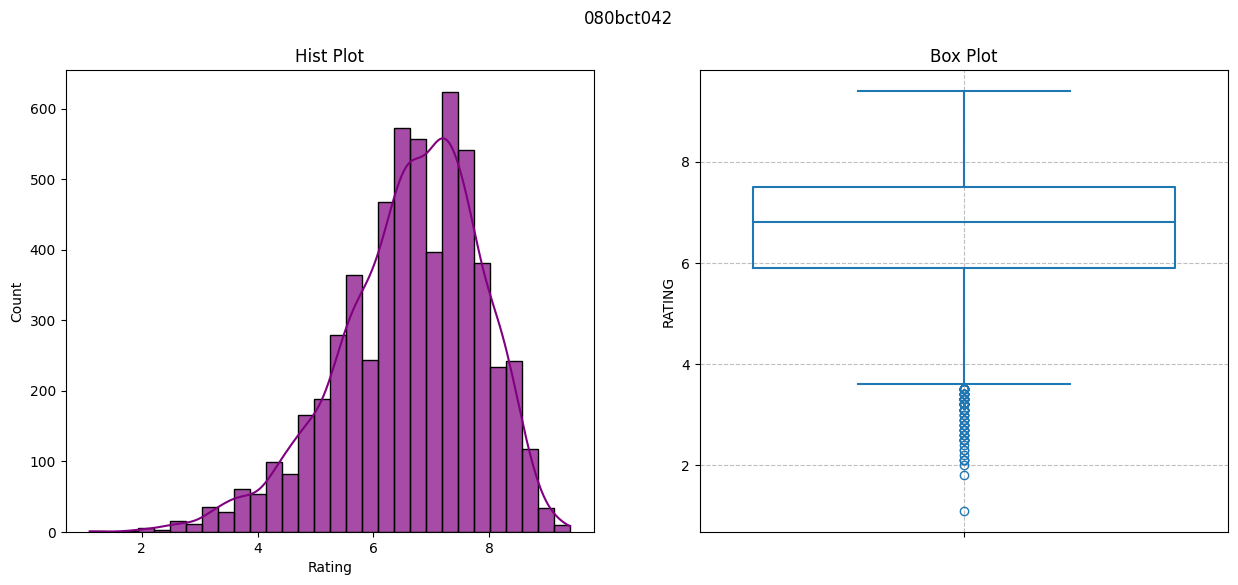

In [ ]:
#  creating the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.suptitle("080bct042")


sns.histplot(data=imdb_df,
                       x='RATING',
                      kde=True,
                      ax=ax[0],
                      bins=30,
                      color='purple',
                      edgecolor='black',
                      alpha=0.7
                       )
ax[0].set_title("Hist Plot")

ax[0].set_xlabel('Rating')

sns.boxplot(data=imdb_df,
            y= imdb_df.RATING,
            ax= ax[1],
            fill=False
            )

ax[1].set_title("Box Plot")


plt.grid(linestyle='--', alpha=0.8)
plt.show()

# Explore which country produces the most shows and movies (separately) and how popular they are (find the rating of top movies and shows for the country producing most shows and movies).

In [ ]:
# transforming the the VOTES columns to numericmel column
merged_df['VOTES'] = merged_df.VOTES.str.replace(",", "" ,regex=True)

merged_df.VOTES = pd.to_numeric(merged_df['VOTES'])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MOVIES         1351 non-null   object 
 1   GENRE          1351 non-null   object 
 2   RATING         1351 non-null   float64
 3   VOTES          1351 non-null   int64  
 4   Released_Year  1351 non-null   object 
 5   type           1351 non-null   object 
 6   title          1351 non-null   object 
 7   director       1351 non-null   object 
 8   country        1351 non-null   object 
 9   rating         1351 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 105.7+ KB


In [ ]:
# finding the country  with highest movie produced
movie_df = merged_df[merged_df['type']=='Movie']
country_df = movie_df.country.str.split(',', expand=True).stack()
country_df = country_df.value_counts()

top_movies = movie_df[movie_df['country'] == country_df.index[0]]
top_movies = top_movies.sort_values(by='RATING', ascending=False)[0:10]

# top movies of USA
print(f"Top Movies for the {country_df.index[0]}")
top_movies[['MOVIES', 'RATING', 'country']]





Top Movies for the United States


,MOVIES,RATING,country
750,In Our Mothers' Gardens,8.9,United States
17,Bo Burnham: Inside,8.7,United States
953,Springsteen on Broadway,8.5,United States
625,Dave Chappelle: Sticks & Stones,8.5,United States
380,Bo Burnham: what.,8.4,United States
1244,Bill Hicks: Sane Man,8.4,United States
352,Bo Burnham: Make Happy,8.4,United States
833,Ben Platt Live from Radio City Music Hall,8.4,United States
776,Nazi Concentration Camps,8.3,United States
492,Kiss the Ground,8.3,United States


In [ ]:
# finding the country  with highest TV Show produced
movie_df = merged_df[merged_df['type']=='TV Show']
country_df = movie_df.country.str.split(',', expand=True).stack()
country_df = country_df.value_counts()

top_movies = movie_df[movie_df['country'] == country_df.index[0]]
top_movies = top_movies.sort_values(by='RATING', ascending=False)[0:10]

# top TV show of USA
print(f"Top TV Show for the {country_df.index[0]}")
top_movies[['MOVIES', 'RATING', 'country', 'type']].reset_index()


Top TV Show for the United States


,index,MOVIES,RATING,country,type
0,1059,Dave Chappelle,8.7,United States,TV Show
1,971,Daughters of Destiny,8.6,United States,TV Show
2,566,Middleditch & Schwartz,8.6,United States,TV Show
3,126,Julie and the Phantoms,8.5,United States,TV Show
4,344,Comedians in Cars Getting Coffee,8.1,United States,TV Show
5,5,Gotham,7.8,United States,TV Show
6,528,The Pharmacist,7.7,United States,TV Show
7,10,You,7.7,United States,TV Show
8,0,The Flash,7.6,United States,TV Show
9,1150,Move,7.6,United States,TV Show


 # Shows/Movies by which director is popular (Find top 10 directors) and all genres for the movies or shows that they made.

In [ ]:
# Split multiple directors into separate rows
exploded_df = merged_df.assign(director=merged_df['director'].str.split(', ')).explode('director')

# Group by directors and calculate the mean rating and sum of genres
director_df = exploded_df.groupby(['director'], as_index=False).agg({'RATING': 'mean', 'GENRE': 'sum'})

# Top 10 directors based on average RATING
top_10_directors = director_df.sort_values(by='RATING', ascending=False).head(10)

# Showing the most popular TV shows/movies of the director
most_popular_titles = []
types = []

# Iterate over top_10_directors to get the most popular title and type
for director in top_10_directors['director']:
    # Get the row with the highest RATING for the director
    popular_row = exploded_df[exploded_df['director'] == director].nlargest(1, 'RATING')

    # Extract the most popular movie/show and its type
    most_popular_titles.append(popular_row['MOVIES'].values[0])
    types.append(popular_row['type'].values[0])

# Add the new columns to top_10_directors
top_10_directors['popular_work'] = most_popular_titles
top_10_directors['type'] = types

# View the updated top_10_directors
top_10_directors


,director,RATING,GENRE,popular_work,type
1248,Tim Van Someren,9.1,"Documentary, Music",Hans Zimmer: Live in Prague,Movie
625,Jonnie Hughes,9.0,"Documentary, Biography",David Attenborough: A Life on Our Planet,Movie
36,Alastair Fothergill,9.0,"Documentary, BiographyDocumentary",David Attenborough: A Life on Our Planet,Movie
1151,Shantrelle P. Lewis,8.9,Documentary,In Our Mothers' Gardens,Movie
998,Peter Jackson,8.8,"Action, Adventure, DramaAction, Adventure, Drama",The Lord of the Rings: The Return of the King,Movie
918,Nguyen Thanh Tung,8.7,"Documentary, Music",Sky Tour: The Movie,Movie
221,Chris Bould,8.6,"Documentary, ComedyDocumentary, Comedy",Bill Hicks: Revelations,Movie
1285,Vanessa Roth,8.6,Documentary,Daughters of Destiny,TV Show
748,Lilibet Foster,8.6,"Documentary, Biography, Drama",Be Here Now,Movie
1239,Thom Zimny,8.5,"Documentary, Music",Springsteen on Broadway,Movie


In [ ]:
top_10_directors

# exploded_df.loc[625]
# exploded_df[exploded_df['director']=='Jonnie Hughes']['MOVIES']

,director,RATING,GENRE,popular_work,type
1248,Tim Van Someren,9.1,"Documentary, Music",Hans Zimmer: Live in Prague,Movie
625,Jonnie Hughes,9.0,"Documentary, Biography",David Attenborough: A Life on Our Planet,Movie
36,Alastair Fothergill,9.0,"Documentary, BiographyDocumentary",David Attenborough: A Life on Our Planet,Movie
1151,Shantrelle P. Lewis,8.9,Documentary,In Our Mothers' Gardens,Movie
998,Peter Jackson,8.8,"Action, Adventure, DramaAction, Adventure, Drama",The Lord of the Rings: The Return of the King,Movie
918,Nguyen Thanh Tung,8.7,"Documentary, Music",Sky Tour: The Movie,Movie
221,Chris Bould,8.6,"Documentary, ComedyDocumentary, Comedy",Bill Hicks: Revelations,Movie
1285,Vanessa Roth,8.6,Documentary,Daughters of Destiny,TV Show
748,Lilibet Foster,8.6,"Documentary, Biography, Drama",Be Here Now,Movie
1239,Thom Zimny,8.5,"Documentary, Music",Springsteen on Broadway,Movie


# Find the most occurring user viewership category (i.e. ‘rating’ column of the imdb dataset) for the 100 highest voted movies/shows of each year and for each top 10 countries (top countries based on number of shows produced).

In [ ]:
# sort the database by the year and votes
top_100_per_year = imdb_df.sort_values(['Released_Year', 'VOTES'], ascending=[False, False]).groupby('Released_Year').head(100)

# Count the number of movies/shows by country
top_countries = netflix_df['country'].value_counts().head(10).index.tolist()
top_countries


# Clean titles for merging
imdb_df['MOVIES'] = imdb_df['MOVIES'].str.strip().str.lower()
netflix_df['title'] = netflix_df['title'].str.strip().str.lower()

# Merge IMDb and Netflix datasets
merged_df = top_100_per_year.merge(netflix_df, left_on='MOVIES', right_on='title', how='inner')


# Filter by top countries
filtered_df = merged_df[merged_df['country'].isin(top_countries)]


In [ ]:
most_frequent_ratings = (
    filtered_df.groupby(['Released_Year', 'country'])['rating']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)


most_frequent_ratings = (
    filtered_df.groupby(['Released_Year', 'country'])['rating'].agg(lambda x: x.value_counts().idxmax()).reset_index()
)

# renaming the columns
most_frequent_ratings.columns = ['Year', 'Country', 'Most_Popular_Viewership_Category']

most_frequent_ratings

,Year,Country,Most_Popular_Viewership_Category
0,1944,United States,TV-14
1,1945,United States,TV-MA
2,1968,United States,R
3,1973,India,TV-14
4,1975,United Kingdom,PG
...,...,...,...
62,2020,United States,R
63,2021,France,TV-MA
64,2021,India,TV-MA
65,2021,United Kingdom,PG-13




---

### **Discussion**  
This lab explored user viewership trends and production patterns using the IMDb and Netflix datasets. Key findings include:  

- **User Ratings:** Certain rating categories consistently dominated among the top 100 highly voted movies and shows, reflecting global audience preferences.  
- **Country Trends:** The top 10 content-producing countries displayed significant differences in output, influenced by regional preferences and resources.  
- **Movies vs. Shows:** Movies catered to broad, one-time audiences, while shows engaged viewers with serialized storytelling.  
- **Data Challenges:** Merging and cleaning datasets highlighted the importance of data wrangling for reliable results.  

These insights illustrate the power of data analysis in understanding global entertainment trends.

---

### **Conclusion**  
This lab highlighted the role of **EDA** and **data wrangling** in uncovering patterns in user ratings and production trends. We identified key viewership categories, analyzed top content-producing countries, and distinguished differences between movies and shows.  

The results emphasize the importance of clean, structured data for meaningful analysis. Future work could explore genre-specific trends or audience demographics for deeper insights.

---
